# Tarea 3 
## Selección de características


## Métodos univariados

Los métodos univariado de selección de características evalúa y selecciona características (o variables) basándose en pruebas estadísticas univariadas que consideran cada característica de forma individual en relación con la variable objetivo. Estos métodos no tienen en cuenta las posibles interacciones entre características, sino que se centran en la relación directa entre una única característica y la variable objetivo.

### V de cramer // prueba chi cuadrado

In [ ]:
# V de Cramer y prueba chi2

#para variables categóricas

#H0 (Hipótesis nula): No hay asociación entre las dos variables categóricas. Es decir, las variables son independientes entre sí.

#H1 (Hipótesis alternativa): Existe una asociación entre las dos variables categóricas. Es decir, las variables no son independientes


# definimos un diccionario para almacenar los resultados
chi2_check = {}

# iteramos sobre cada columna categórica, calculamos el p-valor de la prueba chi2 y la V de Cramer
for column in X_train.select_dtypes(exclude=[np.number]).columns:
    crosstab = pd.crosstab(y_train, X_train[column])
    chi, p, dof, ex = chi2_contingency(crosstab)
    chi2_check.setdefault('Columna_Categorica',[]).append(column)
    chi2_check.setdefault('p-valor',[]).append(round(p, 10))
    chi2_check.setdefault('V de Cramer',[]).append(cramers_v(y_train, X_train[column]))
  

# convertimos el diccionario en un DataFrame
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['V de Cramer'], ascending = False, ignore_index = True, inplace = True)
chi2_result

#Bajo este enfoque seleccionamos aquellas características con una mayor correlación con la variable objetivo, es decir mayor de v de Cramer o con el menor p-valor



,Columna_Categorica,p-valor,V de Cramer
0,initial_list_status,0.000000,0.051324
1,purpose,0.000000,0.035412
2,verification_status,0.000000,0.030205
3,home_ownership,0.000000,0.027641
4,addr_state,0.000000,0.023815
5,application_type,0.007135,0.004461
6,pymnt_plan,1.000000,0.000000


### ANOVA // prueba F

In [ ]:
#Para variables numéricas vamos a usar la prueba F, para ver si una diferencia entre las medias entre la variable objetivo y las variables numéricas

#H0:(Hipótesis nula): Las medias de la característica numérica son iguales para todas las categorías de la variable objetivo target.

#H1:(Hipótesis alternativa): Al menos una de las medias de la característica numérica es diferente entre las categorías de la variable objetivo target.


# Calculamos el valor F y el p-valor de cada variable numérica
x=X_train.select_dtypes('number')
y=y_train
F_statistic, p_valor = f_classif(x,y)


# convertimos en DF los resultados
Tabla_variables = pd.DataFrame(data = {'Columna_numerica': x.columns.values, 'F-Score': F_statistic, 'p-valor': p_valor.round(decimals=10)})
Tabla_variables.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
Tabla_variables


#La prueba F nos indica que las variables con diferencia significativas entre las medias de la variable separada por la variable objetivo, por lo que las características
#que nos interesarían serian aquellas con u p valor menor al 0.05 o con un F-score mas alto


,Columna_numerica,F-Score,p-valor
0,days_since_issue_d,4582.074887,0.000000
1,int_rate,4499.007717,0.000000
2,out_prncp,986.761334,0.000000
3,inq_last_6mths,505.296607,0.000000
4,days_since_last_credit_pull_d,321.872785,0.000000
5,total_rec_int,225.090470,0.000000
6,last_pymnt_amnt,224.696044,0.000000
7,total_pymnt,207.050257,0.000000
8,total_pymnt_inv,206.983718,0.000000
9,total_rev_hi_lim,188.487548,0.000000


### Information Value

El "Information Value" (IV) entra en la categoría de métodos univariados de selección de características. Es una técnica ampliamente utilizada en la modelación de riesgos de crédito y  para evaluar la importancia predictiva de una característica  (Segmentada en buckets o categorías) en relación con una variable objetivo binaria (por ejemplo, bueno/malo, 1/0, sí/no).


### Weight of Evidence (WoE)

La fórmula para calcular el Weight of Evidence (WoE) para una categoría específica es:

$$ WoE = \ln\left(\frac{\text{Proporción de Eventos Positivos en la Categoría}}{\text{Proporción de Eventos Negativos en la Categoría}}\right) $$

### Information Value (IV)

La fórmula para calcular el Information Value (IV) para una característica específica es:



$$ IV = \sum \left( \left( \text{Proporción de Eventos Positivos en la Categoría} - \text{Proporción de Eventos Negativos en la Categoría} \right) \times WoE \right) $$

Donde la suma se realiza sobre todas las categorías de la característica en cuestión.

In [ ]:
#Antes de continuar con el análisis, es necesario convertir las variables categóricas en numéricas, aplicando la técnica de codificación one-hot encoding
#con variables dummy


#Creamos una copia de nuestros datos sin la creación de variables dummy, para futuros análisis
X_train_pre = X_train.copy()
y_train_pre = y_train.copy()
X_test_pre = X_test.copy()
y_test_pre = y_test.copy()


def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        # Agregamos dtype=int para asegurarnos de que las dummies sean 0 y 1
        df_dummies.append(pd.get_dummies(df[col], prefix=col, prefix_sep=':', dtype=int))
    df_dummies = pd.concat(df_dummies, axis=1)
    df = pd.concat([df, df_dummies], axis=1)
    return df

columnas_objeto = X_train.select_dtypes(include=['object']).columns

# Aplicamos la función para test y train para mantener la misma estructura
X_train = dummy_creation(X_train, columnas_objeto)
X_test = dummy_creation(X_test, columnas_objeto)


#reindexamos los datos para evitar errores
'''
Esto es útil, por ejemplo, después de realizar una codificación "one-hot" o "dummy" en los conjuntos de entrenamiento y prueba.
Puede haber situaciones en las que algunas categorías estén presentes en X_train pero no en X_test y viceversa. 
Al reindexar, te aseguras de que ambas matrices tengan las mismas columnas en el mismo orden.
'''

X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

In [ ]:
# La función woe_discrete calcula el Weight of Evidence (WoE) para una variable discreta.
# Argumentos:
# - df: DataFrame que contiene la variable discreta.
# - cat_variabe_name: Nombre de la columna que contiene la variable discreta.
# - y_df: DataFrame que contiene la variable objetivo (generalmente binaria, 0 o 1).

def woe_discrete(df, cat_variabe_name, y_df):
    # Concatenamos la variable discreta y la variable objetivo en un solo DataFrame.
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    
    # Agrupamos por la variable discreta y calculamos el conteo y la media de la variable objetivo.
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # Seleccionamos las columnas relevantes y renombramos.
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    
    # Calculamos la proporción de observaciones.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculamos el número de "bads" y "goods" basado en la variable objetivo.
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    
    # Si n_good o n_bad son 0, se les suma 0.5
    df['n_good'] = df['n_good'].apply(lambda x: x if x != 0 else x + 0.5)
    df['n_bad'] = df['n_bad'].apply(lambda x: x if x != 0 else x + 0.5)
    
    # Calculamos la proporción de "bads" y "goods".
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    
    # Calculamos el WoE.
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    
    # Ordenamos el DataFrame por WoE.
    df = df.sort_values(['WoE'])
    
    # Restablecemos el índice.
    df = df.reset_index(drop = True)
    
    # Calculamos la diferencia en proporciones y WoE para observaciones consecutivas.
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculamos el Information Value (IV).
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV_sum'] = df['IV'].sum()
    
    # Devolvemos el DataFrame resultante.
    return df


In [ ]:
# Definimos una función para calcular el Weight of Evidence (WoE) para variables continuas.
# Esta función es similar a la que definimos anteriormente para variables discretas.
# La principal diferencia es que no ordenamos el DataFrame por WoE, ya que las variables continuas ya están ordenadas por naturaleza.

def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    # Concatenamos la variable continua y la variable objetivo en un solo DataFrame.
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    
    # Agrupamos por la variable continua y calculamos el conteo y la media de la variable objetivo.
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # Seleccionamos las columnas relevantes y renombramos.
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    
    # Calculamos la proporción de observaciones.
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    
    # Calculamos el número de "bads" y "goods" basado en la variable objetivo.
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    
    # Si n_good o n_bad son 0, se les suma 0.5
    df['n_good'] = df['n_good'].apply(lambda x: x if x != 0 else x + 0.5)
    df['n_bad'] = df['n_bad'].apply(lambda x: x if x != 0 else x + 0.5)
    
    # Calculamos la proporción de "bads" y "goods".
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    
    # Calculamos el WoE.
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    
    # Calculamos la diferencia en proporciones y WoE para observaciones consecutivas.
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # Calculamos el Information Value (IV).
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV_sum'] = df['IV'].sum()
    
    # Devolvemos el DataFrame resultante.
    return df



In [ ]:

sns.set()

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0, ax=None):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    
    if ax is None:  # Si no se proporciona el eje, crea un nuevo gráfico
        plt.figure(figsize=(18, 6))
        plt.plot(x, y, marker='o', linestyle='--', color='k')
        plt.xlabel(df_WoE.columns[0])
        plt.ylabel('Weight of Evidence')
        plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
        plt.xticks(rotation=rotation_of_x_axis_labels)
        plt.show()
    else:  # Si se proporciona el eje, dibuja en ese eje
        ax.plot(x, y, marker='o', linestyle='--', color='k')
        ax.set_xlabel(df_WoE.columns[0])
        ax.set_ylabel('Weight of Evidence')
        ax.set_title(str('Weight of Evidence by ' + df_WoE.columns[0]))
        ax.set_xticks(x)
        ax.set_xticklabels(x, rotation=rotation_of_x_axis_labels)





In [ ]:
X_train_pre.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'days_since_issue_d',
       'days_since_earliest_cr_line', 'days_since_last_credit_pull_d'],
      dtype='object')

In [ ]:
dfs = []
ivtable = pd.DataFrame()
ivtable = pd.DataFrame(columns = ['variable', 'IV'])
cols=X_train_pre.columns
indice=0


#Calculamos el WoE de cada variable categórica y su IV
for col in X_train_pre.select_dtypes('object').columns:
    df_temp = woe_discrete(X_train_pre, col, y_train_pre)
    ivtable.loc[ivtable.shape[0]] = [col, df_temp['IV_sum'].iloc[0]]
    dfs.append(df_temp)


#Calculamos el WoE de cada variable numérica con agrupación y su IV

#definimos las columnas que vamos a agrupar

cols_sin_agg=['term','emp_length','inq_last_6mths']



cols_agg = [col for col in X_train_pre.select_dtypes(include=['number']).columns if col not in cols_sin_agg]



for col in cols_agg:
    X_train_pre[col+'_bin'] = pd.cut(X_train_pre[col], 8)  # Corrección aquí
    df_temp = woe_ordered_continuous(X_train_pre, col+'_bin', y_train_pre)
    ivtable.loc[ivtable.shape[0]] = [col, df_temp['IV_sum'].iloc[0]]
    dfs.append(df_temp)

#calculamos el WoE de cada variable numérica sin agrupación y su IV

for col in cols_sin_agg:
    df_temp = woe_ordered_continuous(X_train_pre, col, y_train_pre)
    ivtable.loc[ivtable.shape[0]] = [col, df_temp['IV_sum'].iloc[0]]
    dfs.append(df_temp)




# X_train_pre[cols[indice]+'_bin'] = pd.cut(X_train_pre[cols[indice]], 10)
# df_temp = woe_ordered_continuous(X_train_pre, cols[indice]+'_bin', y_train_pre)
# ivtable.loc[ivtable['variable']==cols[indice]+'_bin','IV']=df_temp['IV_sum'].iloc[0]
# df_temp

  

# # Llama a la función plot_by_woe para cada dataframe y almacena el eje en axes_list
# for i in range(10):
#     for j in range(4):
#         ax = axs[i, j]
#         plot_by_woe(dfs[i*4 + j], ax)
#         axes_list.append(ax)

In [ ]:
#imprimos la tabla ordena con IV mas alto

'''
Information Value	Variable Predictiveness
Less than 0.02  	Not useful for prediction
0.02 to 0.1	        Weak predictive Power
0.1 to 0.3	        Medium predictive Power
0.3 to 0.5	        Strong predictive Power
>0.5	            Suspicious Predictive Power
'''

ivtable.sort_values(by = 'IV', ascending = False, ignore_index = True, inplace = True)
ivtable

,variable,IV
0,days_since_issue_d,0.933091
1,int_rate,0.631199
2,out_prncp,0.197132
3,last_pymnt_amnt,0.149725
4,initial_list_status,0.118824
5,total_pymnt,0.088951
6,total_pymnt_inv,0.088885
7,inq_last_6mths,0.067480
8,purpose,0.061055
9,verification_status,0.046018


Bajo el criterio del Information Value (IV), las características que deberíamos conservar son las primeras 15, ya que son las que tienen un IV mayor a 0.02. Las demás características no aportan información predictiva.

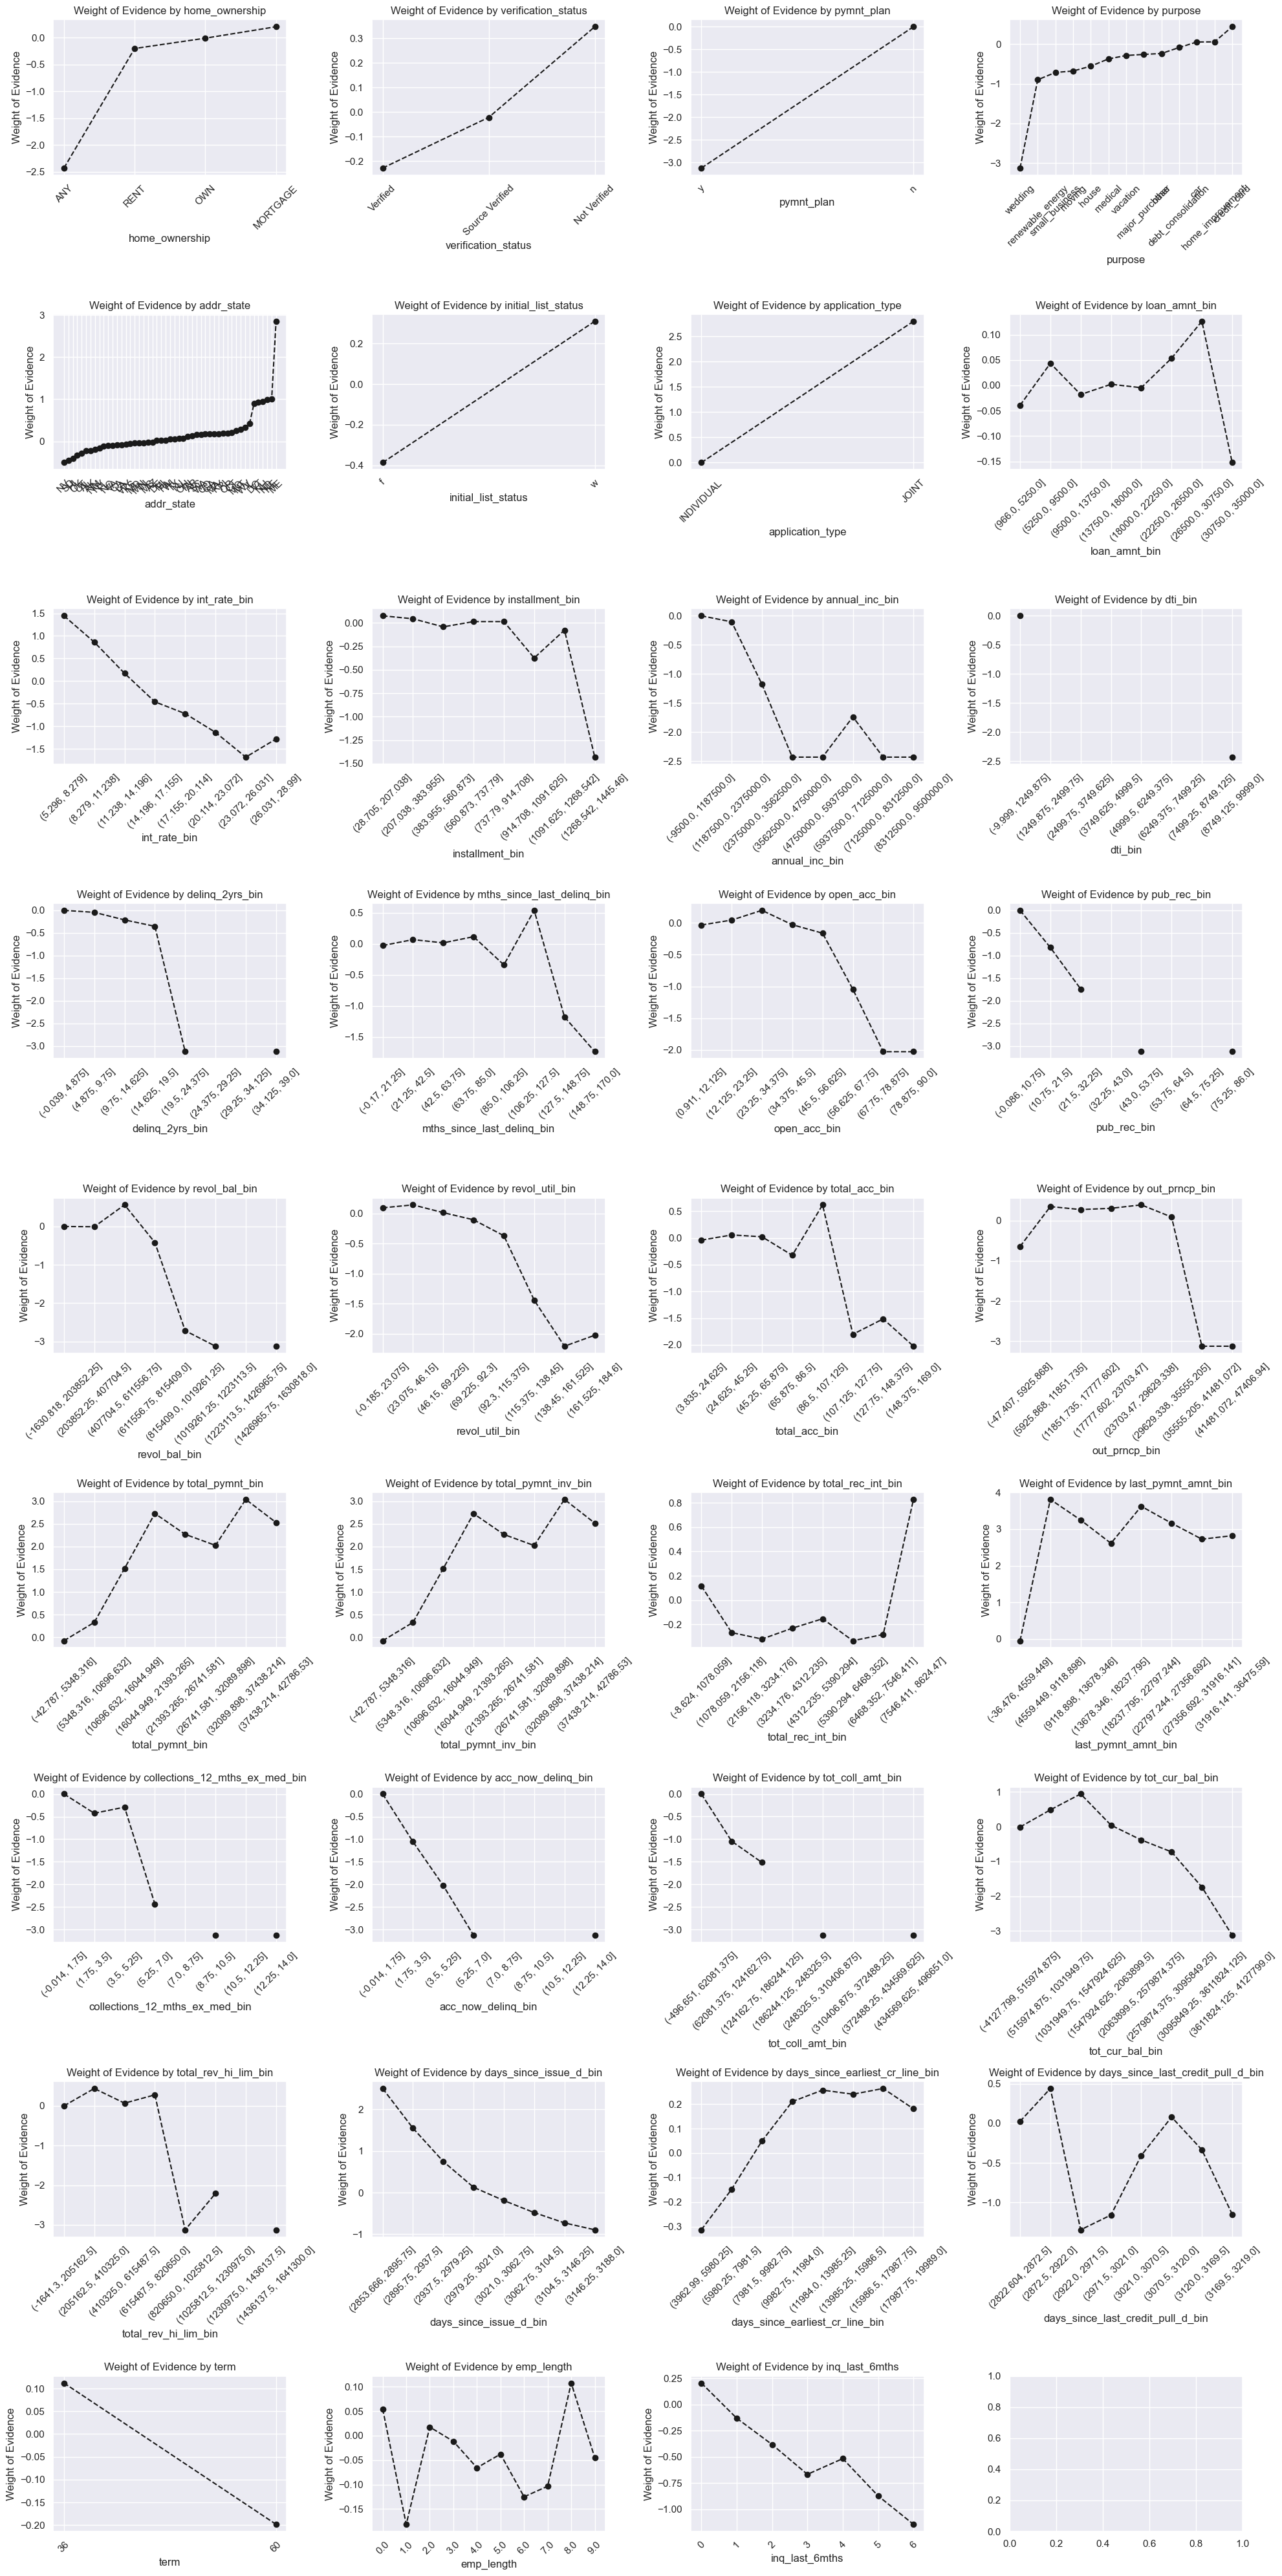

In [ ]:
# Lista para almacenar los ejes de cada gráfico
axes_list = []

# Crear una disposición de 4 columnas por 9 filas
fig, axs = plt.subplots(9, 4, figsize=(20, 40))

# Calcula el número total de gráficos que necesitas hacer
total_plots = len(dfs)

for idx in range(total_plots):
    i = idx // 4  # Calcula la fila
    j = idx % 4   # Calcula la columna
    
    ax = axs[i, j]
    plot_by_woe(dfs[idx], 45, ax)
    axes_list.append(ax)
        
plt.tight_layout()
plt.show()


In [ ]:
df_temp = woe_discrete(X_train_pre, 'purpose', y_train_pre)
df_temp

,purpose,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_bad,prop_n_good,WoE,diff_prop_bad,diff_WoE,IV,IV_sum
0,wedding,3,0.333333,0.000010,1.000000,2.000000,0.000148,0.000007,-3.124523,NaN,NaN,0.000443,0.061055
1,renewable_energy,176,0.051136,0.000561,9.000000,167.000000,0.001335,0.000544,-0.896901,0.282197,2.227622,0.000709,0.061055
2,small_business,2495,0.042886,0.007959,107.000000,2388.000000,0.015871,0.007785,-0.712287,0.008251,0.184613,0.005759,0.061055
3,moving,1810,0.041436,0.005774,75.000000,1735.000000,0.011124,0.005656,-0.676395,0.001449,0.035892,0.003699,0.061055
4,house,1059,0.036827,0.003378,39.000000,1020.000000,0.005785,0.003325,-0.553674,0.004609,0.122722,0.001362,0.061055
5,medical,2917,0.030854,0.009305,90.000000,2827.000000,0.013349,0.009216,-0.370508,0.005974,0.183165,0.001531,0.061055
6,vacation,1656,0.028382,0.005282,47.000000,1609.000000,0.006971,0.005245,-0.284449,0.002472,0.086059,0.000491,0.061055
7,major_purchase,5540,0.027617,0.017672,153.000000,5387.000000,0.022694,0.017562,-0.256364,0.000764,0.028085,0.001316,0.061055
8,other,14242,0.027033,0.045430,385.000000,13857.000000,0.057105,0.045174,-0.234367,0.000585,0.021996,0.002796,0.061055
9,debt_consolidation,186274,0.023320,0.594194,4344.000000,181930.000000,0.644319,0.593093,-0.082844,0.003712,0.151524,0.004244,0.061055


## Método de aprendizaje automático, de relaciones no linales

consiste en la aplicación de un algoritmo de aprendizaje automático para evaluar la importancia de cada característica, y así seleccionar las características más importantes.

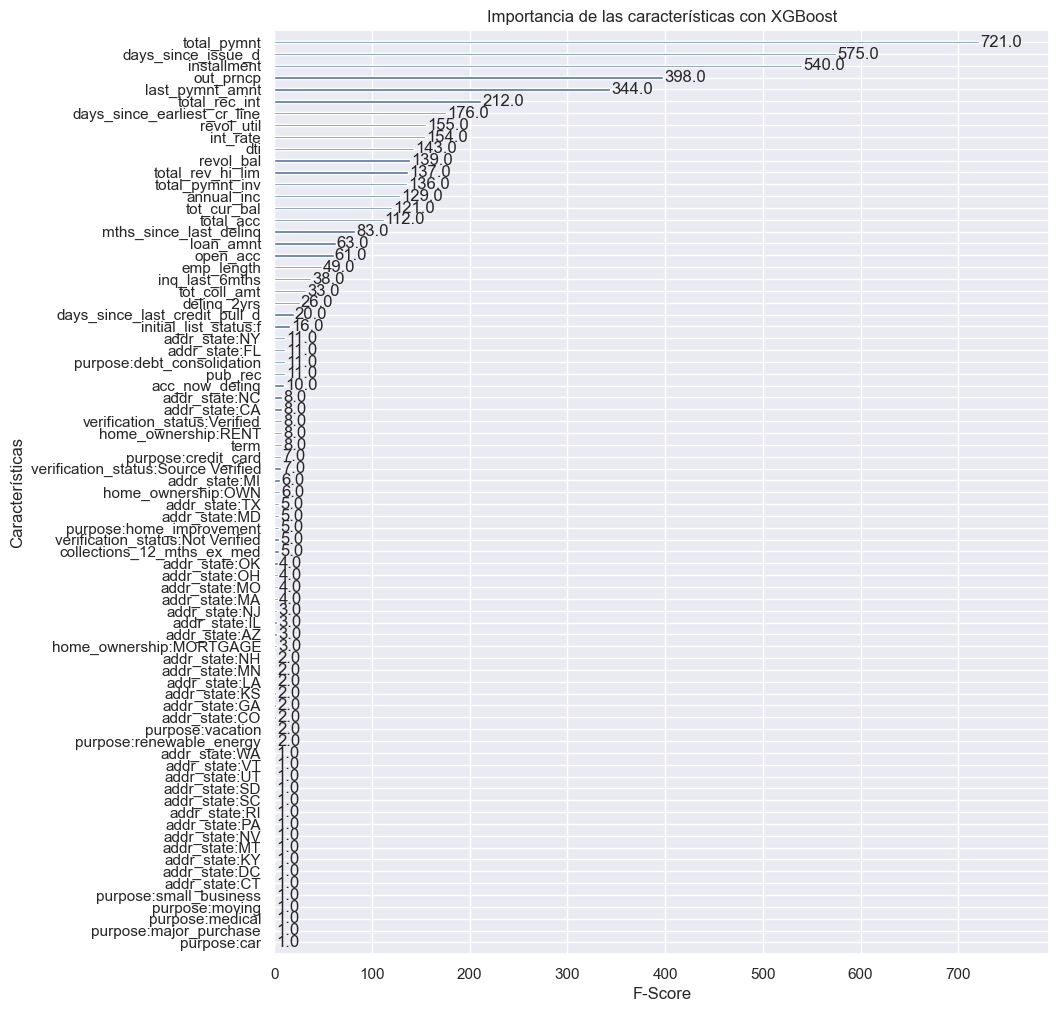

Características seleccionadas: ['addr_state:GA', 'addr_state:IL', 'total_rec_int', 'loan_amnt', 'addr_state:KS', 'term', 'days_since_last_credit_pull_d', 'home_ownership:MORTGAGE', 'total_pymnt_inv', 'out_prncp', 'int_rate', 'total_pymnt', 'days_since_issue_d', 'last_pymnt_amnt', 'installment']


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt


# Entrenar un modelo XGBoost para obtener la importancia de las características
# Eliminar variables de tipo objeto de X_train
X_train = X_train.select_dtypes(exclude='object')

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Ordenar las características según su importancia
sorted_idx = feature_importance.argsort()

# Visualizar la importancia de las características
plt.figure(figsize=(10, 12))
plot_importance(model, importance_type='weight', title='Importancia de las características con XGBoost', xlabel='F-Score', ylabel='Características', ax=plt.gca())
plt.show()

# Seleccionar las N , en este caso las primeras 15 
top_N = 15
selected_features = [X_train.columns[i] for i in sorted_idx[-top_N:]]

print("Características seleccionadas:", selected_features)

In [ ]:
selected_features

['addr_state:GA',
 'addr_state:IL',
 'total_rec_int',
 'loan_amnt',
 'addr_state:KS',
 'term',
 'days_since_last_credit_pull_d',
 'home_ownership:MORTGAGE',
 'total_pymnt_inv',
 'out_prncp',
 'int_rate',
 'total_pymnt',
 'days_since_issue_d',
 'last_pymnt_amnt',
 'installment']

# Variables seleccionadas

Se utilizo el método de XGBoost para seleccionar las variables más importantes. debido a que a su capacidad inherente para capturar interacciones complejas y relaciones no lineales entre las características y la variable objetivo. Mientras que el IV evalúa cada característica de manera univariable y está diseñado principalmente para identificar relaciones lineales, especialmente en contextos de clasificación binaria.


- variables relacionadas con el estado (addr_state:GA, addr_state:IL, addr_state:KS): Estas variables indican que la ubicación geográfica (específicamente los estados de Georgia, Illinois y Kansas) juega un papel importante en la predicción de nuestro objetivo. Podría ser que los patrones de comportamiento crediticio varíen según estas regiones.

- Variables financieras (total_rec_int, loan_amnt, total_pymnt_inv, out_prncp, int_rate, total_pymnt, last_pymnt_amnt, installment): Estas variables tienen un impacto directo en la salud financiera del préstamo y, por lo tanto, son críticas para predecir la solvencia o el comportamiento de pago del prestatario. Específicamente, la tasa de interés, el monto del préstamo, el monto del último pago y el monto de la cuota pueden influir en la capacidad del prestatario para pagar.

- Variable term: El plazo del préstamo puede influir en la probabilidad de impago, ya que un plazo más largo podría correlacionarse con mayores tasas de impago debido a la incertidumbre a largo plazo.

- Variables temporales (days_since_last_credit_pull_d, days_since_issue_d): Estas variables pueden capturar la frescura de la información y cómo ha evolucionado la situación crediticia del prestatario con el tiempo. Por ejemplo, si ha pasado mucho tiempo desde la última consulta de crédito, podría indicar un cambio en la situación financiera del prestatario.

- Variable home_ownership:MORTGAGE: Tener una hipoteca puede ser indicativo de un compromiso financiero a largo plazo y, dependiendo del contexto, podría asociarse con un mayor o menor riesgo para el prestamista.

Referencias.

- https://medium.datadriveninvestor.com/credit-scoring-select-features-that-matter-part-4-6479badc058d
- https://www.mdpi.com/2078-2489/14/3/200